<a href="https://colab.research.google.com/github/Dindaa45/Pemograman_Python/blob/main/TUBES_SKO_Dinda_Mafruhat_1101184119.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TUBES SKO**

**NAMA = DINDA MAFRUHAT**

**NIM = 1101184119**

**KELAS = TT 42 07**



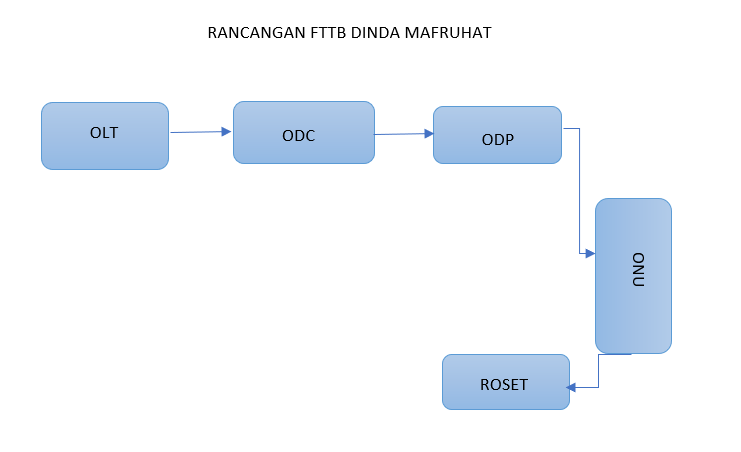

**PENJELASAN:**

Diketahui sebuah gedung 40 lantai, tiap lantai terdapat 20 kamar. 

Parameter - Parameter

1. Menggunakan 6 Konektor

2. Spliter1 ( 1:64 )

3. Spliter2 ( 1:32 )

4. Redaman1 **19.5 dB**

5. Redaman2 **16 dB**

 Menggunakan Fiver jenis **G625D** dengan panjang gelombang 1490 nm dengan redaman 0.28 dB/Km. dengan melihat jumlah konektor menjadi 6 konektor dan 8 buah splicer dengan redaman sebesar 0.1 dB.



In [10]:
import numpy as np
import matplotlib.pyplot as pl
import math as m

In [11]:
#Nilai Lamda
NtL = lambda x : 10 * np.log10(x)
LtN = lambda x : 10**(x/10)

#Nilai Parameter
R = 0.85 #(A/W)
SM = 3 #(dB)
M = -0.23 #(dB)
q = 1.6*10**-19
id = 200*10**-9 #(A)
B = 8*10**9 #(Hz)
F = 1 #F(M), Faktor Gain
K = 1.38*10**-23
Teff = 290 #Kelvin
RL = 50 #(Ohm)

#parameter Pr
#Jarak Sentral ke ODP = 18
#Jarak ODP ke Roset = <500m , jadi yang di pakai sesuai absen dinda 19*2 = 38
#Jarak Total = 18000 + 38 = 18038

d = np.arange(0.038,18.039,1) #(km)
L_fiber = 0.28 #(dB)  
N_splicer = 8 #Jumlah Splicer
L_splicer = 0.1 #(db)
N_connector = 6 #Jumlah Konektor
L_connector = 0.3 #(dB)
L_splitter = 16 + 19.5 #(dB) 
Pt = 3 #Daya tx (dBm)

In [12]:
#RUMUS X_receive
def X_receive():
  hambatan_fiber = d * L_fiber
  hambatan_splicer = N_splicer * L_splicer
  hambatan_connector = N_connector * L_connector

  alfa_total = hambatan_fiber + hambatan_splicer + hambatan_connector + L_splitter + SM
  Pr = Pt - alfa_total
  return Pr

Pr = X_receive()
print('Daya Terima = ', Pr)

Daya Terima =  [-38.11064 -38.39064 -38.67064 -38.95064 -39.23064 -39.51064 -39.79064
 -40.07064 -40.35064 -40.63064 -40.91064 -41.19064 -41.47064 -41.75064
 -42.03064 -42.31064 -42.59064 -42.87064 -43.15064]


In [13]:
#Arus Dalam
def arus_dalam():
  Pr_num = LtN(Pr)
  ip = Pr_num * R
  return ip
ip = arus_dalam()
print("Ip = ", ip)

Ip =  [1.31327273e-04 1.23127461e-04 1.15439630e-04 1.08231811e-04
 1.01474034e-04 9.51381990e-05 8.91979608e-05 8.36286191e-05
 7.84070160e-05 7.35114393e-05 6.89215325e-05 6.46182103e-05
 6.05835790e-05 5.68008619e-05 5.32543301e-05 4.99292366e-05
 4.68117553e-05 4.38889232e-05 4.11485869e-05]


In [14]:
#Signal Power
def signal_power():
  Is_kuadrat = (ip*M)**2
  return Is_kuadrat
Is_kuadrat = signal_power()
print('Is^2 = ', Is_kuadrat)

Is^2 =  [9.12358502e-10 8.01983667e-10 7.04961701e-10 6.19677209e-10
 5.44710220e-10 4.78812548e-10 4.20887011e-10 3.69969160e-10
 3.25211222e-10 2.85867987e-10 2.51284397e-10 2.20884643e-10
 1.94162575e-10 1.70673276e-10 1.50025652e-10 1.31875926e-10
 1.15921909e-10 1.01897968e-10 8.95706083e-11]


In [15]:
#RUMUS SNR
def SNR():
  BDC = 2*q*id*B*(M**2)*F 
  SN = 2*q*ip*B*(M**2)*F 
  NT = (4*K*Teff*B)/RL 
  Signal = Is_kuadrat
  Noise = BDC + SN + NT

  SNR = Signal / Noise
  SNR_dBm = NtL(SNR)
  return SNR_dBm

SNR = SNR()
print(SNR)

[25.48698698 24.92885727 24.37061152 23.81225689 23.25380008 22.69524742
 22.13660483 21.57787787 21.01907177 20.46019142 19.90124142 19.34222609
 18.78314948 18.2240154  17.66482741 17.10558886 16.54630288 15.98697243
 15.42760027]


In [16]:
#RUMUS Y
def Y_rumus():
  Y_rumus = 0.5*(10**(SNR/20))
  return Y_rumus
Y = Y_rumus()
print(Y)

[9.40414579 8.81886852 8.26990614 7.75501869 7.27210278 6.81918347
 6.39440657 5.99603139 5.62242399 5.27205066 4.94347196 4.63533695
 4.34637785 4.075405   3.82130212 3.58302177 3.35958125 3.15005855
 2.9535887 ]


In [17]:
#RUMUS BER
pengkali_list = []
def BER_rumus():
  akar = 1/(Y * m.sqrt(2 * m.pi))
  for i in range(len(Y)):
    pengkali = m.exp(-(Y[i]**2)/2)
    pengkali_list.append(pengkali)
  BER = (1/akar)*(pengkali_list)
  return BER
BER = BER_rumus()
print(BER)

[1.47350194e-18 2.86043174e-16 2.92144749e-14 1.69577936e-12
 5.98753978e-11 1.36521577e-09 2.11874777e-08 2.34418024e-07
 1.92588620e-06 1.21777364e-05 6.11640432e-05 2.50882244e-04
 8.61169815e-04 2.52742492e-03 6.46310669e-03 1.46417614e-02
 2.98181442e-02 5.52948859e-02 9.44312117e-02]


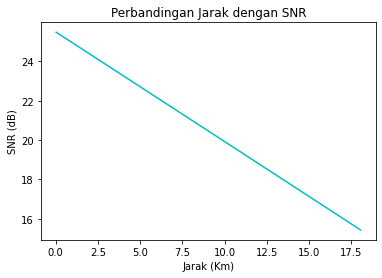

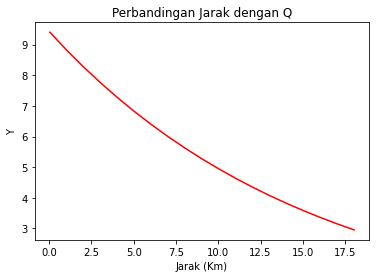

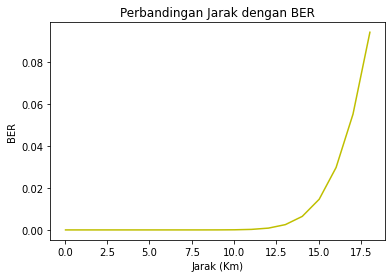

In [18]:
#GRAFIK
def grafik_1():
  pl.figure()
  pl.plot(d,SNR,'c')
  pl.title('Perbandingan Jarak dengan SNR')
  pl.xlabel('Jarak (Km)')
  pl.ylabel('SNR (dB)')
  pl.show()

def grafik_2():
  pl.figure()
  pl.plot(d,Y,'r')
  pl.title('Perbandingan Jarak dengan Q')
  pl.xlabel('Jarak (Km)')
  pl.ylabel('Y')
  pl.show()

def grafik_3():
  pl.figure()
  pl.plot(d,BER,'y')
  pl.title('Perbandingan Jarak dengan BER')
  pl.xlabel('Jarak (Km)')
  pl.ylabel('BER')
  pl.show()

grafik_1()
grafik_2()
grafik_3()